In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### GaussianDistribution for Prior Probabilities

In [2]:
BANDIT_PROB = [1.0,2.0,3.0] #win rate of 3 bandit of casino
NUM_TRIALS = 10000

In [3]:
class Bandit:
    
    def __init__(self,p):
        self.p = p #true mean
        self.pred_mean = 0 # cal mean after every sample
        self.lamda = 1 #precision for mean sample
        self.sum_x = 0 # Exi upto N sample
        self.tau = 1   #precision for gau_distribution
        self.N = 0  #current sample
        
    def pull(self): # X = Z*sigma + mu and sigma = 1/sqrt(tau)
        return np.random.randn()/np.sqrt(self.tau)+self.p
    
    def sampling(self):
        return np.random.randn()/np.sqrt(self.lamda)+self.pred_mean
    
    def update(self,x):
        self.lamda += self.tau
        self.sum_x += x
        self.pred_mean = (self.tau*self.sum_x)/self.lamda
        self.N+=1

In [4]:
def plot(bandit,trial):
    x = np.linspace(-3,6,200) #xaxis
    for b in bandit:
        y = norm.pdf(x,b.pred_mean,np.sqrt(1./b.lamda)) #here we pass x or mean or varaince  for dist
        plt.plot(x,y,label=f"real p: {b.p:4f}, num plays = {b.N}")
    plt.title(f'bandit Gaussian dis. after {trial} trails')
    plt.legend()
    plt.show()

In [5]:
def experiment(sample_pnts):
    bandit = [Bandit(p) for p in BANDIT_PROB]
    reward = np.zeros(NUM_TRIALS)
    optimal_j = np.argmax([b.p for b in bandit])
    print("optimal j::",optimal_j)
    
    for  i in range(NUM_TRIALS):
        j = np.argmax([b.sampling() for b in bandit])
        
        if i in sample_pnts:
            plot(bandit,i)
        
        x = bandit[j].pull() #pull arm of bandit with the largest sample
        
        reward[i] = x    #collect reward
        
        bandit[j].update(x)   #update the distribution whose arm just pulled
        
    #print reward
    print('total reward earned: ',reward.sum())
    print('win rate: ',reward.sum()/NUM_TRIALS)
    print('no of times every bandit arm pulled',[b.N for b in bandit])
    #plot the result
#     cum_reward = np.cumsum(reward)
#     win_rate = cum_reward/(np.arange(NUM_TRIALS)+1)
#     plt.ylim([0,1])
#     plt.plot(win_rate)
#     plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROB))
#     plt.show()

optimal j:: 2


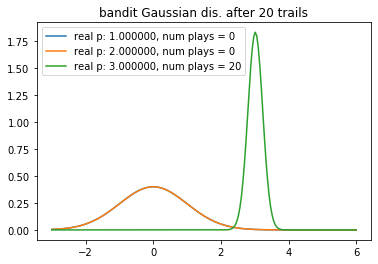

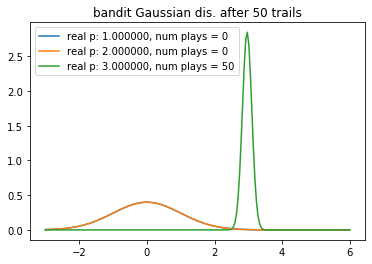

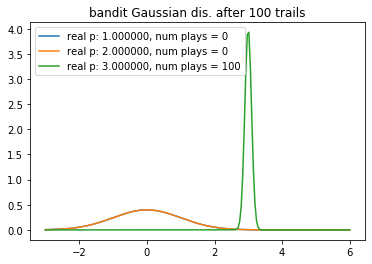

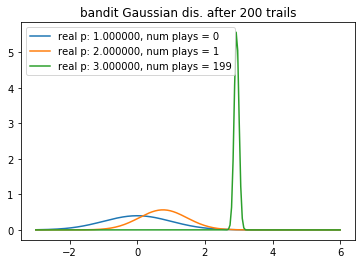

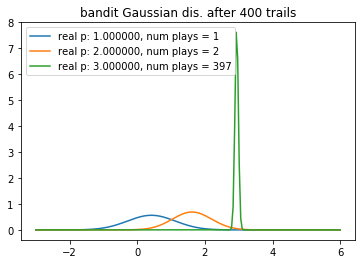

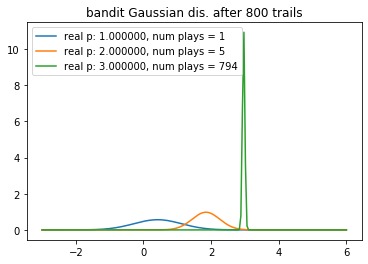

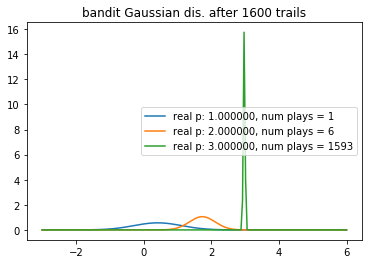

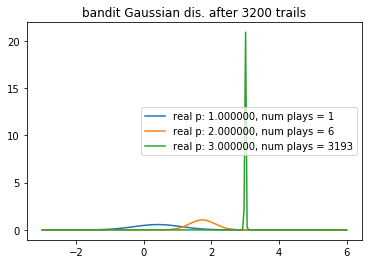

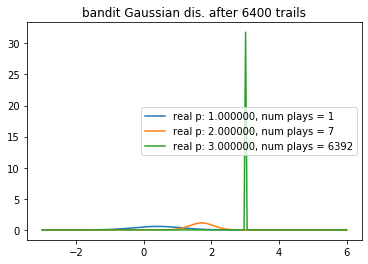

total reward earned:  30138.21827550112
win rate:  3.013821827550112
no of times every bandit arm pulled [1, 8, 9991]


In [6]:
experiment([20,50,100,200,400,800,1600,3200,6400,10000])